In [15]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [16]:
df = pd.read_csv('homeprices_multi.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [17]:
# rounded median for bedrooms to fill nAN
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [18]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [19]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression()

In [20]:
f"The coefficient for area is {reg.coef_[0]}, for bedrooms is {reg.coef_[1]}, and for age is {reg.coef_[2]}"

'The coefficient for area is 112.06244194213465, for bedrooms is 23388.880077939117, and for age is -3231.7179086329706'

In [21]:
reg.predict([[3000, 3, 40]])

c:\Users\qasim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

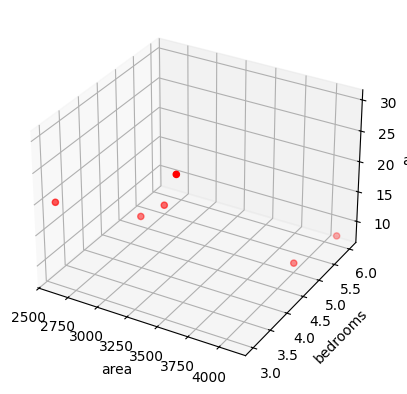

In [22]:
# Plotting to slope

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.area, df.bedrooms, df.age, c='red', marker='o')
ax.set_xlabel('area')
ax.set_ylabel('bedrooms')
ax.set_zlabel('age')
plt.show()
    

Exercie on Hiring Model

In [27]:
hiring_data = pd.read_csv('hiring.csv')
hiring_data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [28]:
# fill nAN 
hiring_data.experience = hiring_data.experience.fillna('zero')

# convert words to numbers
from word2number import w2n
hiring_data.experience = hiring_data.experience.apply(w2n.word_to_num)



hiring_data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [30]:
# fill nan in test score
median_test_score = math.floor(hiring_data['test_score(out of 10)'].median())
hiring_data['test_score(out of 10)'] = hiring_data['test_score(out of 10)'].fillna(median_test_score)
hiring_data 

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [31]:
model = linear_model.LinearRegression()
model.fit(hiring_data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], hiring_data['salary($)'])


LinearRegression()

In [32]:
model.predict([[2, 9, 6]])

c:\Users\qasim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [33]:
model.predict([[12, 10, 10]])

c:\Users\qasim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])